# 网络流量分析

- 4/13 被通知网络流量异常
- 4/17 分析 2017/04/10~2017/04/15 的网络使用情况

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

In [3]:
import sys 
reload(sys)
sys.setdefaultencoding('gb2312')

gb_id = u'工号'.encode('gb2312')
gb_name = u'姓名'.encode('gb2312')
gb_datetime = u'日期时间'.encode('gb2312')
gb_type = u'类型'.encode('gb2312')
gb_url = u'网站'.encode('gb2312')
gb_volume = u'流量'.encode('gb2312')
gb_others = u'其他'.encode('gb2312')

In [4]:
# 载入数据 0410~0415
df0410 = pd.read_csv('0410.csv',index_col=gb_datetime,parse_dates=True)
df0411 = pd.read_csv('0411.csv',index_col=gb_datetime,parse_dates=True)
df0412 = pd.read_csv('0412.csv',index_col=gb_datetime,parse_dates=True)
df0413 = pd.read_csv('0413.csv',index_col=gb_datetime,parse_dates=True)
df0414 = pd.read_csv('0414.csv',index_col=gb_datetime,parse_dates=True)
df0415 = pd.read_csv('0415.csv',index_col=gb_datetime,parse_dates=True)

df = pd.concat([df0410,df0411,df0412,df0413,df0414,df0415])

In [5]:
# 观察第一笔记录
df.ix[0]

工号            315657
姓名               吕明宪
类型                营销
网站                ::
流量              0.02
Unnamed: 6       NaN
Name: 2017-04-10 08:34:19, dtype: object

In [6]:
# 总流量
df[gb_volume].sum()

1648.49

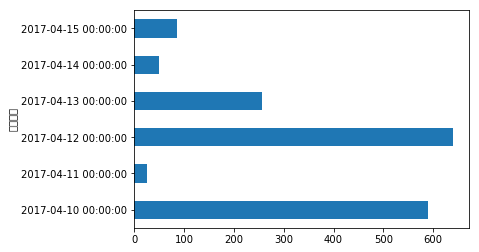

In [7]:
# 日流量长条图
df[gb_volume].resample('1D', how='sum').plot(kind='barh')

In [8]:
# 流量排行
df.groupby(gb_type)[gb_volume].sum().sort_values(ascending=False).head(10)

类型
百度音乐        1082.08
IT相关         189.91
搜索引擎          79.13
未识别应用         61.74
OneDrive      31.64
PC微信传文件       27.54
PC微信收文件       26.01
微信            20.16
新闻门户          14.10
IT行业          13.38
Name: 流量, dtype: float64

- 百度音乐占大部分流量

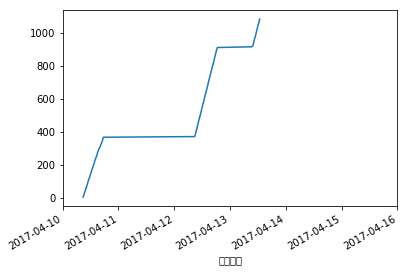

In [9]:
# 百度音乐累计流量
df[df[gb_type] == u'百度音乐'][gb_volume].cumsum().plot(xlim=['2017-04-10','2017-04-16'])

- 接到通知即刻停止使用百度音乐，在4/13以后不再产生流量

In [9]:
df_baidu_music = df[df[gb_type] == u'百度音乐']
df_it_related = df[df[gb_type] == u'IT相关']
df_search_engine = df[df[gb_type] == u'搜索引擎']
df_unknown_app = df[df[gb_type] == u'未识别应用']
df_others =  df[(df[gb_type] != u'百度音乐') &
                (df[gb_type] != u'IT相关') &
                (df[gb_type] != u'搜索引擎') &
                (df[gb_type] != u'未识别应用')]

In [10]:
df_baidu_music.groupby(lambda idx: idx.day)[gb_volume].sum()

10    366.64
12    543.25
13    172.19
Name: 流量, dtype: float64

In [11]:
df_it_related.groupby(lambda idx: idx.day)[gb_volume].sum()

10    84.26
11     1.31
12    31.96
13    27.63
14    12.84
15    31.91
Name: 流量, dtype: float64

In [12]:
df_search_engine.groupby(lambda idx: idx.day)[gb_volume].sum()

10    45.60
11     0.13
12    12.67
13     4.77
14     5.37
15    10.59
Name: 流量, dtype: float64

In [13]:
df_unknown_app.groupby(lambda idx: idx.day)[gb_volume].sum()

10    14.89
11     1.97
12     9.18
13     7.24
14    11.16
15    17.30
Name: 流量, dtype: float64

In [14]:
df_others.groupby(lambda idx: idx.day)[gb_volume].sum()

10    78.29
11    22.99
12    43.03
13    44.54
14    20.19
15    26.59
Name: 流量, dtype: float64

In [15]:
usage = pd.concat([df_baidu_music.groupby(lambda idx: idx.day)[gb_volume].sum(),
                   df_it_related.groupby(lambda idx: idx.day)[gb_volume].sum(),
                   df_search_engine.groupby(lambda idx: idx.day)[gb_volume].sum(),
                   df_unknown_app.groupby(lambda idx: idx.day)[gb_volume].sum(),
                   df_others.groupby(lambda idx: idx.day)[gb_volume].sum()], axis=1)
usage.columns = ['music','it','search','unkonwn','others']
usage

,music,it,search,unkonwn,others
10,366.64,84.26,45.60,14.89,78.29
11,NaN,1.31,0.13,1.97,22.99
12,543.25,31.96,12.67,9.18,43.03
13,172.19,27.63,4.77,7.24,44.54
14,NaN,12.84,5.37,11.16,20.19
15,NaN,31.91,10.59,17.30,26.59


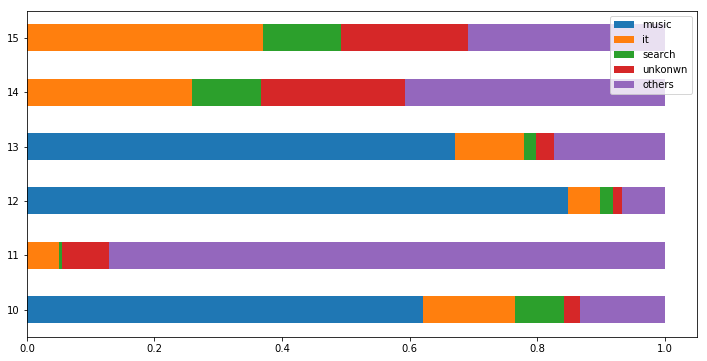

In [16]:
acc = usage.sum(axis=1)
usage_pct = usage.div(acc, axis=0)
usage_pct.plot(kind='barh', stacked=True, figsize=(12,6))
